<img src="images/tennisballbounce1.jpg" alt="Drawing" style="width: 600px;"/><img src="images/rafashot.jpg" alt="Drawing" style="width: 492px;"/>

## ATP Match Study: How ATP Players Win Matches

[Write intro here]
Like most sports, tennis is replete with statistics. Some are interesting for spectators; others useful for players coaches. Some may be only for tennis geeks or trivia enthusiasts. For this project, I wanted to see if I could find any match specific statistics that could potentially differentiate between tennis match winners and losers. Is there one thing, or perhaps a few things, that players and coaches could use to improve their chances to win more matches.

In [1]:
import pandas as pd, csv, matplotlib.pyplot as plt, numpy as np, seaborn as sns, sklearn as sk

### The Stats We Measured

Here's how I performed this study.

I took data from 88,249 matches from ATP tournaments from 1991 to 2016 and divided it into two categories: 1) match winner and 2) match loser.

For each match, I collected 17 stats per player:

 -  \# of aces
 -  \# of double faults
 -  \# of first serves in
 -  total # of first serves
 -  \# of first serve points won
 -  total # of first serve points
 -  \# of second points won
 -  total # of second serve points
 -  \# of service points won
 -  total # of service points
 -  \# of first serve return points won
 -  total # of first serve return points
 -  \# of second serve return points won
 -  total # of second serve return points
 -  total # of points won
 -  total # of service games
 -  total # of return games
 
 Additionally, I calculated six additional match statistics for each player. The reason for creating these additional statistics is to allow for relative comparisons, since the winners statistics from a raw values perspective is much different between 6-0, 6-0 match and a 7-6, 6-7, 7-6, 6-7, 7-6 match. 
 
 -  ace percentage
 -  double fault percentage
 -  service points won percentage
 -  return points won percentage
 -  break points won percentage
 -  total points won percentage

There are several more statistics that I would have liked to have had. Perhaps on the next project. For now, let's take a look at what we've got.

In [2]:
# Import Match Statistics csv file.
statsdf = pd.read_csv('data/matchstats.csv')

In [3]:
# Set some sensible display options for data investigation
pd.options.display.max_columns = 15
pd.options.display.max_rows = 500

In [4]:
# Define Main Columns for different types of data frames
main_cols_stats = ['rank_dif','winner_ace_pct','loser_ace_pct','ace_dif','winner_df_pct','loser_df_pct','df_dif','winner_srv_pts_pct','loser_srv_pts_pct','srv_pts_dif',
                   'winner_rtn_pts_pct','loser_rtn_pts_pct','rtn_pts_dif','winner_brk_pts_pct','loser_brk_pts_pct','brk_pts_dif']
main_cols_winner = ['winner_aces','winner_double_faults','winner_first_serves_in','winner_first_serves_total','winner_first_serve_points_won','winner_first_serve_points_total',
                    'winner_second_serve_points_won','winner_second_serve_points_total','winner_break_points_saved','winner_break_points_serve_total',
                    'winner_service_points_won','winner_service_points_total','winner_first_serve_return_won','winner_first_serve_return_total',
                    'winner_second_serve_return_won','winner_second_serve_return_total','winner_break_points_converted','winner_break_points_converted',
                    'winner_service_games_played','winner_return_games_played','winner_return_points_won','winner_return_points_total','winner_total_points_won',
                    'winner_total_points_total']
main_cols_loser = ['loser_aces','loser_double_faults','loser_first_serves_in','loser_first_serves_total','loser_first_serve_points_won','loser_first_serve_points_total',
                   'loser_second_serve_points_won','loser_second_serve_points_total','loser_break_points_saved','loser_break_points_serve_total','loser_service_points_won',
                   'loser_service_points_total','loser_first_serve_return_won','loser_first_serve_return_total','loser_second_serve_return_won',
                   'loser_second_serve_return_total','loser_break_points_converted','loser_break_points_converted','loser_service_games_played',
                   'loser_return_games_played','loser_return_points_won','loser_return_points_total','loser_total_points_won','loser_total_points_total']

In [5]:
statsdf.head()

,Unnamed: 0,match_id,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,...,loser_brk_pts_pct,ace_dif,df_dif,srv_pts_dif,rtn_pts_dif,brk_pts_dif,rank_dif
0,0,1991-7308-k181-l206,80.0,3.0,0.0,0.0,65.0,...,100.000000,3.166109,0.000000,9.453735,9.453735,-42.857143,-5.0
1,1,1991-7308-k181-s351,89.0,1.0,2.0,44.0,65.0,...,60.000000,-12.919370,-3.614458,10.732159,10.732159,-2.857143,9.0
2,2,1991-7308-k181-s424,55.0,0.0,1.0,17.0,36.0,...,66.666667,-3.703704,-1.851852,29.629630,29.629630,3.333333,-11.0
3,3,1991-7308-a031-s331,69.0,2.0,3.0,44.0,58.0,...,25.000000,-1.908867,-1.785714,8.559113,8.559113,30.555556,-48.0
4,4,1991-7308-k030-w136,89.0,6.0,3.0,37.0,71.0,...,66.666667,2.200704,1.562500,11.971831,11.971831,-16.666667,32.0


### Let's look at the winner statistics.

In [6]:
statsdf.loc[:,main_cols_winner].describe().T

,count,mean,std,min,25%,50%,75%,max
winner_aces,88249.0,6.237419,5.092993,0.0,3.0,5.0,9.0,113.0
winner_double_faults,88249.0,2.728167,2.340265,0.0,1.0,2.0,4.0,23.0
winner_first_serves_in,88249.0,45.308593,20.234890,0.0,32.0,43.0,56.0,361.0
winner_first_serves_total,88249.0,77.115265,28.302553,22.0,56.0,72.0,93.0,491.0
winner_first_serve_points_won,88249.0,35.211436,13.179096,3.0,26.0,33.0,42.0,292.0
winner_first_serve_points_total,88249.0,46.839704,18.401658,9.0,33.0,43.0,57.0,361.0
winner_second_serve_points_won,88249.0,16.605401,6.800410,0.0,12.0,16.0,20.0,82.0
winner_second_serve_points_total,88249.0,30.275561,13.027984,0.0,21.0,28.0,37.0,130.0
winner_break_points_saved,88249.0,3.368752,3.106680,0.0,1.0,3.0,5.0,24.0
winner_break_points_serve_total,88249.0,5.014153,4.107953,0.0,2.0,4.0,7.0,34.0


### Now let's look at the loser statistics.

In [7]:
statsdf.loc[:,main_cols_loser].describe().T

,count,mean,std,min,25%,50%,75%,max
loser_aces,88249.0,4.617514,4.432620,0.0,2.0,3.0,6.0,103.0
loser_double_faults,88249.0,3.513298,2.595608,0.0,2.0,3.0,5.0,26.0
loser_first_serves_in,88249.0,47.234360,18.554117,7.0,34.0,44.0,57.0,328.0
loser_first_serves_total,88249.0,79.928872,28.132924,27.0,59.0,74.0,95.0,489.0
loser_first_serve_points_won,88249.0,31.228377,13.861930,1.0,21.0,29.0,39.0,284.0
loser_first_serve_points_total,88249.0,47.234360,18.554117,7.0,34.0,44.0,57.0,328.0
loser_second_serve_points_won,88249.0,14.839364,7.045357,0.0,10.0,14.0,19.0,101.0
loser_second_serve_points_total,88249.0,32.694512,12.971264,0.0,23.0,30.0,40.0,161.0
loser_break_points_saved,88249.0,4.786298,3.224498,-6.0,2.0,4.0,7.0,28.0
loser_break_points_serve_total,88249.0,8.738943,4.023520,0.0,6.0,8.0,11.0,35.0


### What about the statistical categories we created to compare the differences between winner and loser.

In [8]:
statsdf.loc[:,main_cols_stats].describe().T

,count,mean,std,min,25%,50%,75%,max
rank_dif,88249.0,-52.054040,195.183544,-2126.000000,-75.000000,-24.000000,19.000000,1777.000000
winner_ace_pct,88249.0,8.341499,6.336801,0.000000,3.680982,6.976744,11.538462,56.756757
loser_ace_pct,88249.0,5.599407,4.661784,0.000000,2.127660,4.587156,7.865169,40.000000
ace_dif,88249.0,2.742093,7.339802,-31.668052,-1.708619,2.086721,6.666667,55.002371
winner_df_pct,88249.0,3.416205,2.731151,0.000000,1.515152,2.941176,4.838710,31.481481
loser_df_pct,88249.0,4.511474,3.174937,0.000000,2.150538,4.000000,6.250000,35.416667
df_dif,88249.0,-1.095269,3.983805,-35.416667,-3.448276,-1.086957,1.428571,25.925926
winner_srv_pts_pct,88249.0,68.224091,6.719319,19.696970,63.529412,67.857143,72.580645,100.000000
loser_srv_pts_pct,88249.0,56.694536,7.437428,14.285714,52.054795,57.031250,61.682243,85.185185
srv_pts_dif,88249.0,11.529555,9.119715,-39.393939,5.032468,10.270270,16.767984,68.292683


### So it looks like the winner did better in every category, although some of the differences are relatively small. (For double faults, 'df_dif', a negative number means the winner had fewer double faults, which is better.)

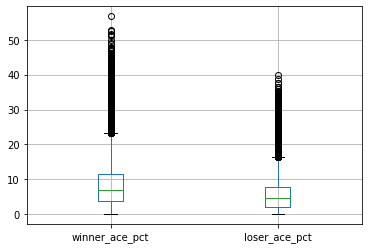

In [18]:
boxplot = statsdf.boxplot(column=['winner_ace_pct', 'loser_ace_pct'])

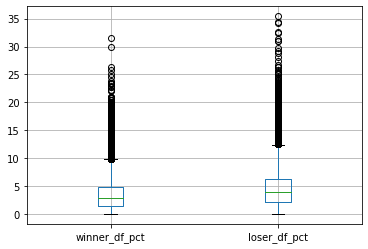

In [19]:
boxplot = statsdf.boxplot(column=['winner_df_pct', 'loser_df_pct'])

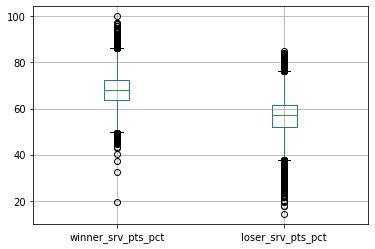

In [20]:
boxplot = statsdf.boxplot(column=['winner_srv_pts_pct', 'loser_srv_pts_pct'])

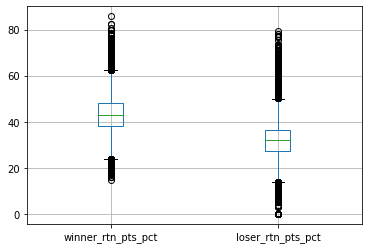

In [21]:
boxplot = statsdf.boxplot(column=['winner_rtn_pts_pct', 'loser_rtn_pts_pct'])

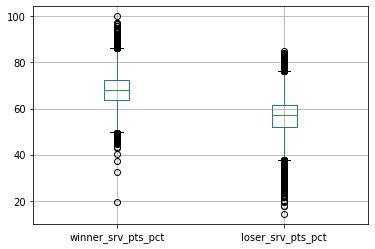

In [22]:
boxplot = statsdf.boxplot(column=['winner_srv_pts_pct', 'loser_srv_pts_pct'])

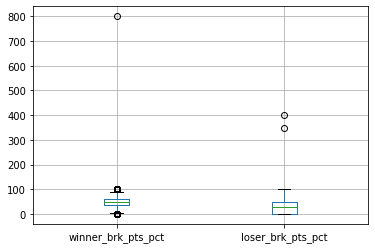

In [23]:
boxplot = statsdf.boxplot(column=['winner_brk_pts_pct', 'loser_brk_pts_pct'])

Working Space Below

In [9]:
ace_pct_df = statsdf[["winner_ace_pct"]]
# ace_pct_df.columns = ['Ace %']
ace_pct_df['result'] = 'Winner'
ace_pct_df.head()

C:\Users\ironm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Ace %,result
0,4.615385,Winner
1,1.538462,Winner
2,0.000000,Winner
3,3.448276,Winner
4,8.450704,Winner


In [10]:
loser_ace_pct_df = statsdf[["loser_ace_pct"]]
loser_ace_pct_df.columns = ['Ace %']
loser_ace_pct_df['result'] = 'Loser'
loser_ace_pct_df.head()

C:\Users\ironm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Ace %,result
0,1.449275,Loser
1,14.457831,Loser
2,3.703704,Loser
3,5.357143,Loser
4,6.250000,Loser


In [11]:
ace_pct_df.append(loser_ace_pct_df, ignore_index=True, sort=False)

,Ace %,result
0,4.615385,Winner
1,1.538462,Winner
2,0.000000,Winner
3,3.448276,Winner
4,8.450704,Winner
...,...,...
176493,10.389610,Loser
176494,8.888889,Loser
176495,8.620690,Loser
176496,4.166667,Loser


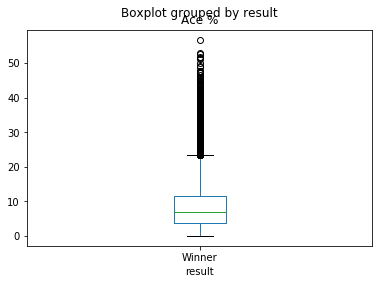

In [17]:
ace_pct_df.boxplot(by='result', 
                       column=['Ace %'], 
                       grid=False)

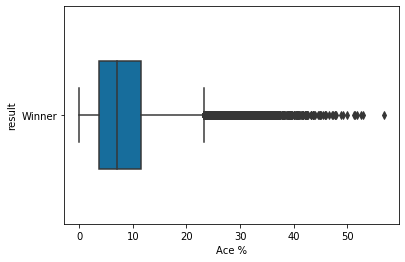

In [14]:
bplot = sns.boxplot(y='result', x='Ace %', 
                 data=ace_pct_df, 
                 width=0.5,
                 palette="colorblind")

In [ ]:
g = sns.catplot(x="winner_ace_pct_df", y="loser_ace_pct_df", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);

In [ ]:
g = sns.catplot(x="winner_ace_pct", y="loser_ace_pct", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=statsdf)
g.set(xscale="log");

In [ ]:
boxplot = statsdf.boxplot(column=['winner_ace_pct', 'loser_ace_pct'])

In [ ]:
statsdf['winner_ace_pct'].value_counts(bins=7,normalize=True)

In [ ]:
statsdf['winner_ace_pct'].value_counts(bins=7)

In [ ]:
statsdf['loser_ace_pct'].value_counts(bins=7,normalize=True)

In [ ]:
statsdf['loser_ace_pct'].value_counts(bins=7)

In [ ]:
ax = statsdf[['winner_ace_pct','loser_ace_pct']].plot(kind='bar', title="Aces Comparison",figsize=(15,10),legend=True,fontsize=12)
ax.set_xlabel("Percent of Serves that were Aces", fontsize=12)
ax.set_ylabel("Percent", fontsize=12)
plt.show()

In [ ]:
statsdf['winner_ace_pct'].hist(bins=50)
statsdf['loser_ace_pct'].hist(bins=50)

In [ ]:
statsdf['loser_df_pct'].hist(bins=50)
statsdf['winner_df_pct'].hist(bins=50)

In [ ]:
ax = statsdf[['winner_ace_pct','loser_ace_pct']].plot(kind='bar', title="Aces Comparison",figsize=(15,10),legend=True,fontsize=12)
ax.set_xlabel("Percent of Serves that were Aces", fontsize=12)
ax.set_ylabel("Percent", fontsize=12)
plt.show()

In [ ]:
ax = sns.boxplot(x="winner_ace_pct", data=statsdf)
ax = sns.swarmplot(x="winner_ace_pct", data=statsdf,color=".25")